# Mid Bootcamp Classification Project
## Attempt 2 - making some features categorical

## Importing Libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing CSV

In [81]:
df = pd.read_excel('creditcardmarketing.xlsx')

## EDA

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       18000 non-null  int64  
 1   Offer Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer Type           18000 non-null  object 
 4   Income Level          18000 non-null  object 
 5   # Bank Accounts Open  18000 non-null  int64  
 6   Overdraft Protection  18000 non-null  object 
 7   Credit Rating         18000 non-null  object 
 8   # Credit Cards Held   18000 non-null  int64  
 9   # Homes Owned         18000 non-null  int64  
 10  Household Size        18000 non-null  int64  
 11  Own Your Home         18000 non-null  object 
 12  Average Balance       17976 non-null  float64
 13  Q1 Balance            17976 non-null  float64
 14  Q2 Balance            17976 non-null  float64
 15  Q3 Balance         

In [83]:
df['Offer Accepted'].value_counts()

No     16977
Yes     1023
Name: Offer Accepted, dtype: int64

### Normalising column header names

In [84]:
df.columns = ['customer_number', 'offer_accepted', 'reward', 'mailer-type',
       'income_level', 'no_bank_accounts_open', 'overdraft_protection',
       'credit_rating', 'no_credit_cards_held', 'no_homes_owned',
       'household_size', 'own_your_home', 'average_balance', 'q1_balance',
       'q2_balance', 'q3_balance', 'q4_balance']

In [85]:
df.columns

Index(['customer_number', 'offer_accepted', 'reward', 'mailer-type',
       'income_level', 'no_bank_accounts_open', 'overdraft_protection',
       'credit_rating', 'no_credit_cards_held', 'no_homes_owned',
       'household_size', 'own_your_home', 'average_balance', 'q1_balance',
       'q2_balance', 'q3_balance', 'q4_balance'],
      dtype='object')

### next

In [86]:
df.head()

,customer_number,offer_accepted,reward,mailer-type,income_level,no_bank_accounts_open,overdraft_protection,credit_rating,no_credit_cards_held,no_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_number        18000 non-null  int64  
 1   offer_accepted         18000 non-null  object 
 2   reward                 18000 non-null  object 
 3   mailer-type            18000 non-null  object 
 4   income_level           18000 non-null  object 
 5   no_bank_accounts_open  18000 non-null  int64  
 6   overdraft_protection   18000 non-null  object 
 7   credit_rating          18000 non-null  object 
 8   no_credit_cards_held   18000 non-null  int64  
 9   no_homes_owned         18000 non-null  int64  
 10  household_size         18000 non-null  int64  
 11  own_your_home          18000 non-null  object 
 12  average_balance        17976 non-null  float64
 13  q1_balance             17976 non-null  float64
 14  q2_balance             17976 non-null  float64
 15  q3

### Filling nulls with average

In [88]:
df['average_balance'] = df['average_balance'].fillna(df['average_balance'].mean())
df['q1_balance'] = df['q1_balance'].fillna(df['q1_balance'].mean())
df['q2_balance'] = df['q2_balance'].fillna(df['q2_balance'].mean())
df['q3_balance'] = df['q3_balance'].fillna(df['q3_balance'].mean())
df['q4_balance'] = df['q4_balance'].fillna(df['q4_balance'].mean())

### Looking for multicolinearity

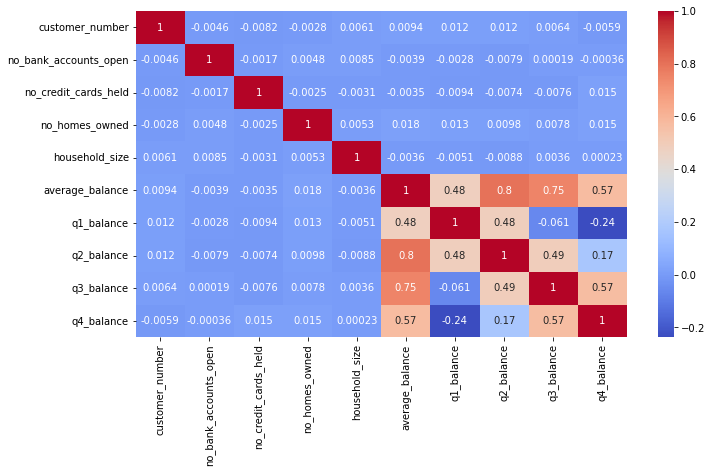

In [89]:
plt.figure(figsize=(11, 6))
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm');

### Dropping customer_number

In [90]:
df.drop('customer_number', axis=1, inplace=True)

### Looking at chi-squared

In [91]:
from scipy.stats import chi2_contingency

In [92]:
contingency= pd.crosstab(df['credit_rating'], df['offer_accepted']) 

<AxesSubplot:xlabel='offer_accepted', ylabel='credit_rating'>

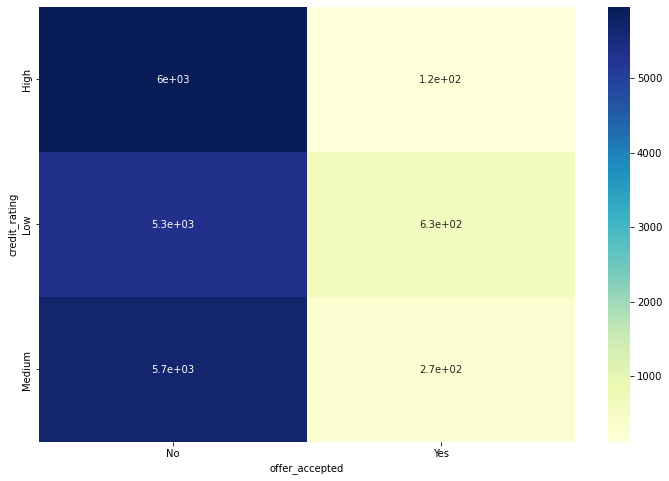

In [93]:
plt.figure(figsize=(12,8)) 
sns.heatmap(contingency, annot=True, cmap="YlGnBu")

In [94]:
for x in df.select_dtypes(include='object').columns:
    contingency= pd.crosstab(df[x], df['offer_accepted'])
    print('chi_squared p-value of',x, 'is', chi2_contingency(contingency, correction=False)[0])

chi_squared p-value of offer_accepted is 18000.0
chi_squared p-value of reward is 101.99764699462307
chi_squared p-value of mailer-type is 171.13002056177373
chi_squared p-value of income_level is 114.36759816901265
chi_squared p-value of overdraft_protection is 0.1443392833541908
chi_squared p-value of credit_rating is 443.1289291631659
chi_squared p-value of own_your_home is 0.0016758285818582156


## Changing some columns to categorical

In [95]:
#no_bank_accounts_open, no_credit_cards_held, no_homes_owned, household_size

In [96]:
df['no_bank_accounts_open'] = df['no_bank_accounts_open'].astype('object')
df['no_credit_cards_held'] = df['no_credit_cards_held'].astype('object')
df['no_homes_owned'] = df['no_homes_owned'].astype('object')
df['household_size'] = df['household_size'].astype('object')

## Modelling

### Splitting in numerical and categorical

In [110]:
df.columns

Index(['offer_accepted', 'reward', 'mailer-type', 'income_level',
       'no_bank_accounts_open', 'overdraft_protection', 'credit_rating',
       'no_credit_cards_held', 'no_homes_owned', 'household_size',
       'own_your_home', 'average_balance', 'q1_balance', 'q2_balance',
       'q3_balance', 'q4_balance'],
      dtype='object')

In [111]:
X = df.select_dtypes(include=np. number)
cat = df.select_dtypes(include=object)
cat.drop('offer_accepted', axis=1, inplace=True)
y = df['offer_accepted']

/Applications/anaconda3/envs/da_env/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Looking for outliers

In [112]:
# consider whether to deal with outliers

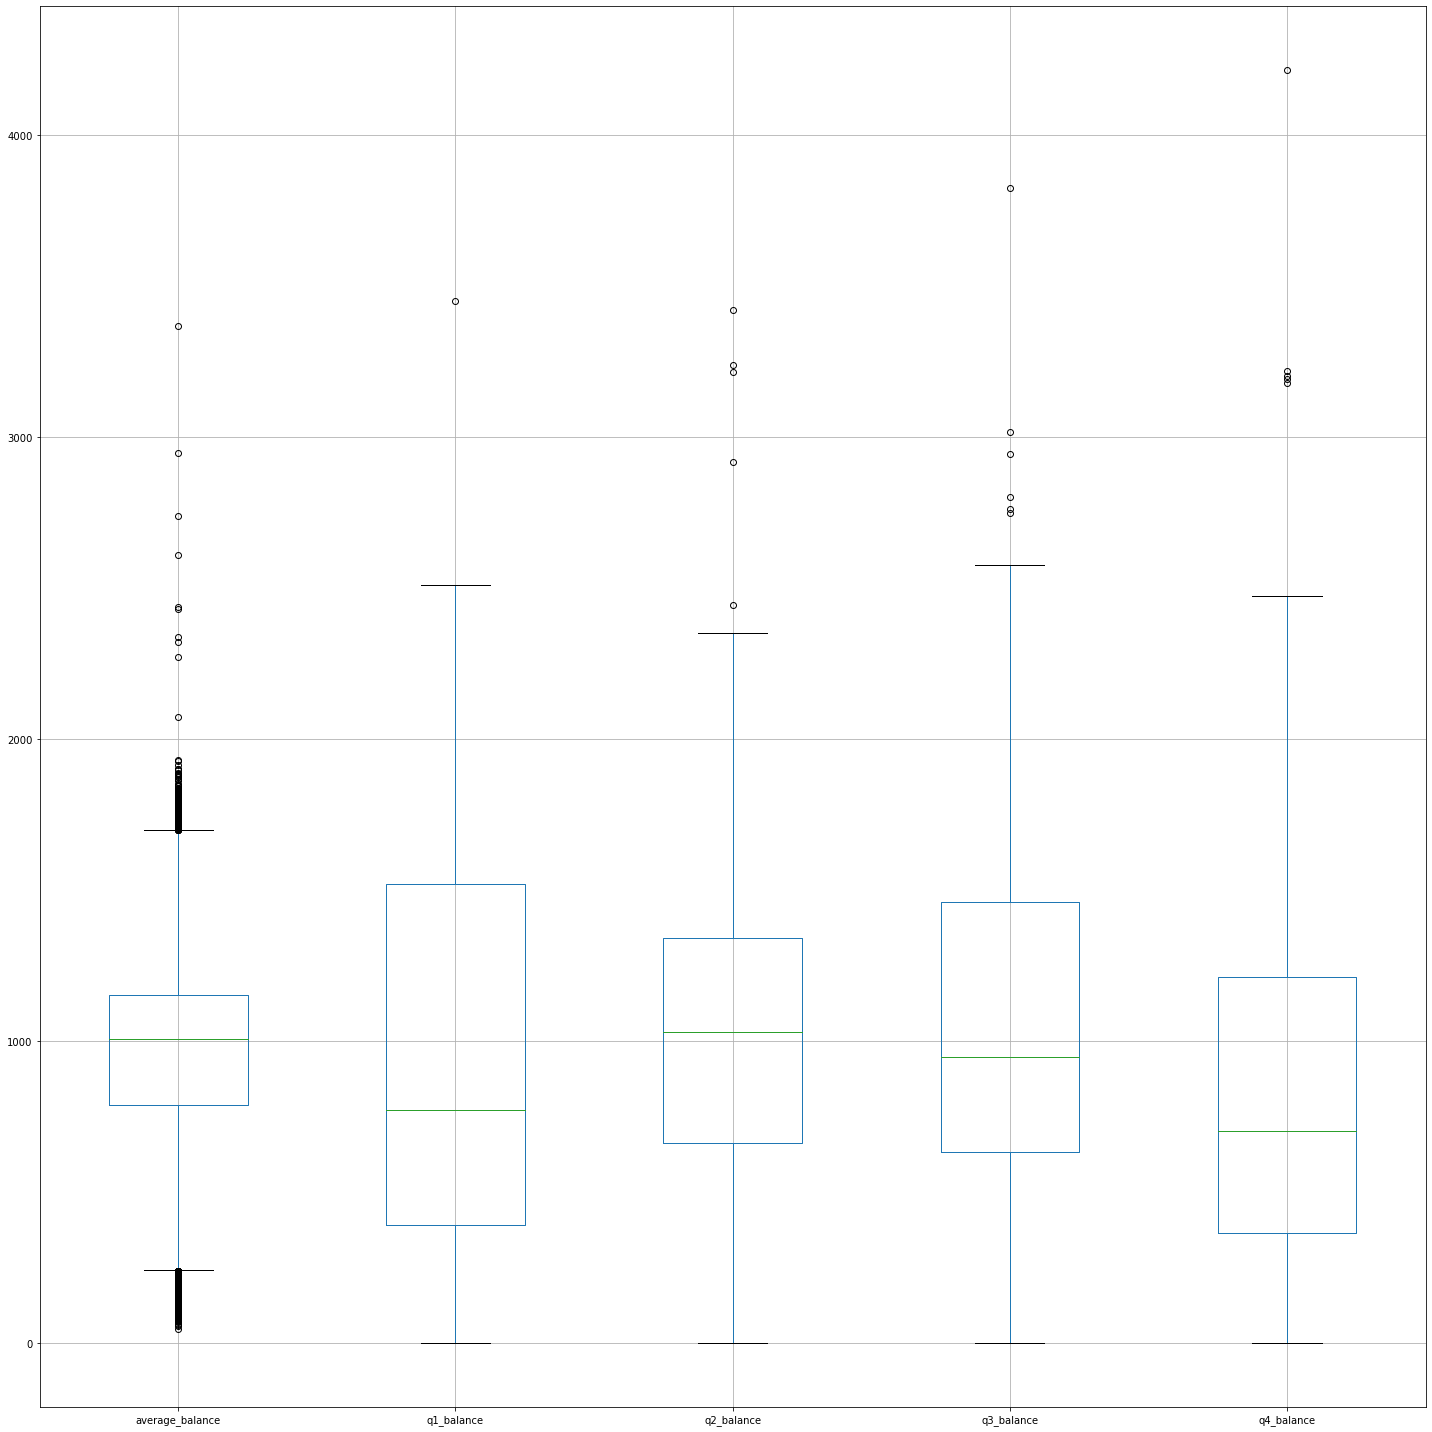

In [113]:
plt.figure(figsize=(20, 20))
X.boxplot()
plt.tight_layout()

### scaling numerical data

In [114]:
#sns.pairplot(X)

In [115]:
from sklearn.preprocessing import StandardScaler

In [116]:
scaler = StandardScaler()
scaler.fit(X)
x_scaled = scaler.transform(X)
x = pd.DataFrame(x_scaled, columns = X.columns)

In [117]:
#sns.pairplot(x)

### Getting dummies for categorical data

In [118]:
categorical = pd.get_dummies(cat, drop_first=True)

In [119]:
categorical

,reward_Cash Back,reward_Points,mailer-type_Postcard,income_level_Low,income_level_Medium,no_bank_accounts_open_2,no_bank_accounts_open_3,overdraft_protection_Yes,credit_rating_Low,credit_rating_Medium,...,no_homes_owned_2,no_homes_owned_3,household_size_2,household_size_3,household_size_4,household_size_5,household_size_6,household_size_8,household_size_9,own_your_home_Yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
2,0,0,1,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
17996,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
17997,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
17998,1,0,0,0,1,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1


### Concatenating data

In [120]:
x_full = pd.concat([x, categorical], axis=1)

## Model Candidate 1

### Imports

In [121]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [197]:
X_train, X_test, y_train, y_test = train_test_split(x_full, y, test_size=0.3, random_state=100)

In [227]:
lr = LogisticRegression(max_iter=400).fit(X_train, y_train)
y_pred =lr.predict(X_test)

In [213]:
y_train.value_counts()

No     11862
Yes      738
Name: offer_accepted, dtype: int64

In [199]:
accuracy_score(y_pred, y_test)

0.9472222222222222

In [200]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

/Applications/anaconda3/envs/da_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/envs/da_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/envs/da_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

,No,Yes,accuracy,macro avg,weighted avg
precision,0.947222,0.0,0.947222,0.473611,0.897230
recall,1.000000,0.0,0.947222,0.500000,0.947222
f1-score,0.972896,0.0,0.947222,0.486448,0.921549
support,5115.000000,285.0,0.947222,5400.000000,5400.000000


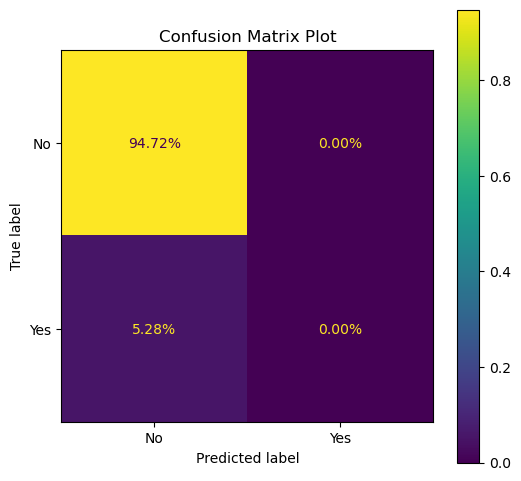

In [201]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(lr, X_test, y_test, ax=ax, normalize='all', values_format='.2%');

## Model Candidate 2
### Using SMOTE to fix imbalance in data

In [127]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [128]:
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [129]:
len(X_train_sm), len(y_train_sm)

(23724, 23724)

In [130]:
y_train_sm.value_counts()

Yes    11862
No     11862
Name: offer_accepted, dtype: int64

In [229]:
lr = LogisticRegression(max_iter=400).fit(X_train_sm, y_train_sm)
y_pred_sm =lr.predict(X_test)

In [230]:
accuracy_score(y_test ,y_pred_sm)

0.7562962962962962

In [133]:
pd.DataFrame(classification_report(y_test, y_pred_sm, output_dict=True))

,No,Yes,accuracy,macro avg,weighted avg
precision,0.960291,0.095276,0.756852,0.527783,0.914637
recall,0.775367,0.424561,0.756852,0.599964,0.756852
f1-score,0.857977,0.155627,0.756852,0.506802,0.820909
support,5115.000000,285.000000,0.756852,5400.000000,5400.000000


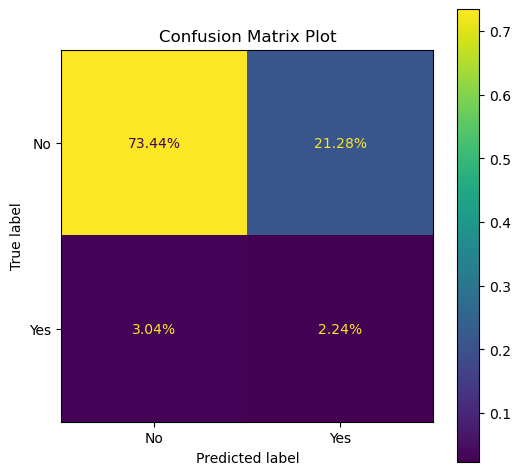

In [134]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(lr, X_test, y_test, ax=ax, normalize='all', values_format='.2%');

## TOMEK LINKS 3
### Using Tomek Links to undersample

In [209]:
from imblearn.under_sampling import TomekLinks
tomek = TomekLinks(sampling_strategy='majority')

In [210]:
X_train, X_test, y_train, y_test = train_test_split(x_full, y, test_size=0.3, random_state=100)

In [211]:
X_train_tk, y_train_tk = tomek.fit_resample(X_train, y_train)

In [212]:
y_train_tk.value_counts()

No     11563
Yes      738
Name: offer_accepted, dtype: int64

In [139]:
lr.fit(X_train_tk, y_train_tk)
y_pred_tk = lr.predict(X_test)

In [140]:
accuracy_score(y_test, y_pred_tk)

0.9472222222222222

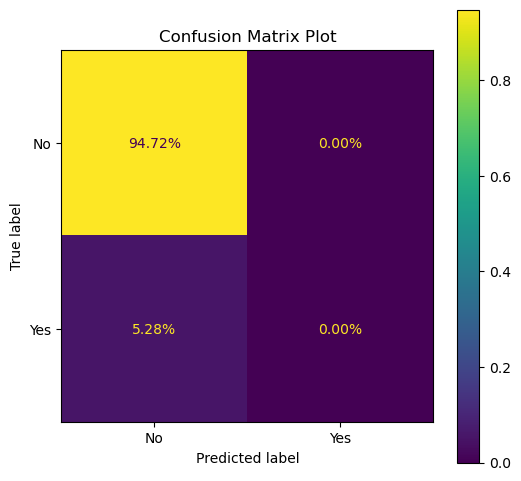

In [142]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(lr, X_test, y_test, ax=ax, normalize='all', values_format='.2%');

## Model Candidate 4
### Using Smote and Tomek together

In [220]:
X_train, X_test, y_train, y_test = train_test_split(x_full, y, test_size=0.3, random_state=100)

In [221]:
X_train_tk, y_train_tk = tomek.fit_resample(X_train, y_train)

In [222]:
y_train_tk.value_counts()

No     11563
Yes      738
Name: offer_accepted, dtype: int64

In [223]:
X_train_tk_sm, y_train_tk_sm = smote.fit_resample(X_train_tk, y_train_tk)

In [224]:
y_train_tk_sm.value_counts()

Yes    11563
No     11563
Name: offer_accepted, dtype: int64

In [231]:
lr = LogisticRegression(max_iter=400).fit(X_train_tk_sm, y_train_tk_sm)
y_pred_tk_sm = lr.predict(X_test)

In [232]:
accuracy_score(y_test, y_pred_tk_sm)

0.7594444444444445

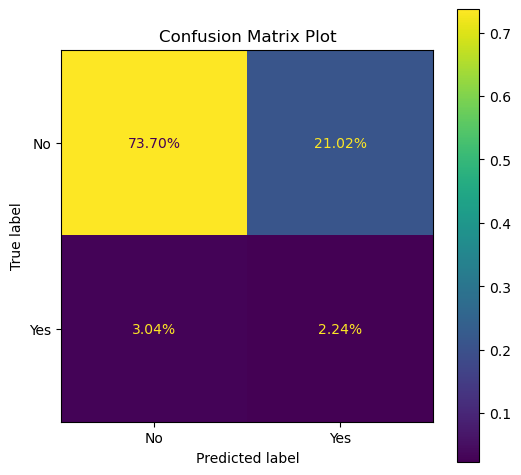

In [233]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(lr, X_test, y_test, ax=ax, normalize='all', values_format='.2%');

## Model Candidate 5
### K Nearest Neighbours - with smote + tomek

In [234]:
from sklearn.neighbors import KNeighborsClassifier

In [235]:
kn = KNeighborsClassifier(n_neighbors=5, p=2)
kn.fit(X_train_tk_sm, y_train_tk_sm)
y_pred_kn = kn.predict(X_test)

In [236]:
accuracy_score(y_test ,y_pred_kn)


0.6985185185185185

In [237]:
pd.DataFrame(classification_report(y_test, y_pred_kn, output_dict=True))

,No,Yes,accuracy,macro avg,weighted avg
precision,0.959178,0.081098,0.698519,0.520138,0.912835
recall,0.712023,0.456140,0.698519,0.584082,0.698519
f1-score,0.817325,0.137712,0.698519,0.477518,0.781456
support,5115.000000,285.000000,0.698519,5400.000000,5400.000000


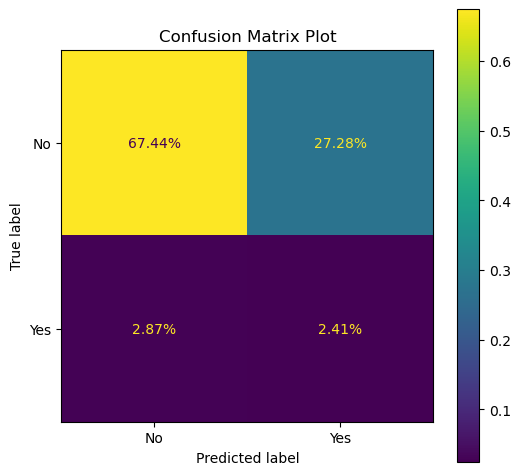

In [238]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(kn, X_test, y_test, ax=ax, normalize='all', values_format='.2%');

## Candidate Model 6
### Random Forest - with smote + tomek

In [239]:
from sklearn.ensemble import RandomForestClassifier

In [240]:
rf=RandomForestClassifier(n_estimators=1000)

rf.fit(X_train_tk_sm,y_train_tk_sm)

y_pred_rf=rf.predict(X_test)

In [241]:
accuracy_score(y_test ,y_pred_rf)

0.8992592592592593

In [242]:
pd.DataFrame(classification_report(y_test, y_pred_rf, output_dict=True))

,No,Yes,accuracy,macro avg,weighted avg
precision,0.949990,0.096573,0.899259,0.523282,0.904949
recall,0.943304,0.108772,0.899259,0.526038,0.899259
f1-score,0.946635,0.102310,0.899259,0.524473,0.902074
support,5115.000000,285.000000,0.899259,5400.000000,5400.000000


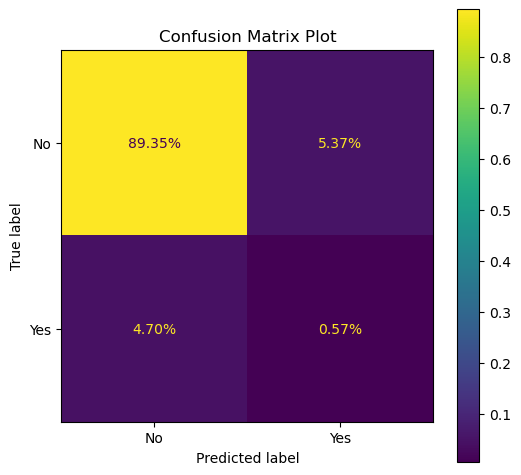

In [243]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(rf, X_test, y_test, ax=ax, normalize='all', values_format='.2%');